!@sumanth13131
# converting the 'ppm' to 'jpeg' and BGR to GRAY_SCALE('L') # 

In [ ]:
from PIL import Image
print(Image.__version__)
import os
import glob
path='-----'
repath='-----'
i=0
for file in os.listdir(path):
    i=i+1
    j=str(i)
    image=Image.open(path+file)
    image=image.convert('L')
    img_resized= image.resize((128,128))
    #imgs.append(repath+l[0]+'.jpg')
    img_resized.save(repath+'20_kmph'+'.' + j + ".jpg" ,'JPEG')
    i=int(j)





# taking path of the gray imgs in one list

In [137]:
imgs_path=[]
gray_path="sample_images/"
for i in x:
    for f in os.listdir(gray_path+i+'/'):
        img=Image.open(gray_path+i+'/'+f)
        imgs_path.append(gray_path+i+'/'+f)
    

In [159]:
print(imgs_path[ : 15])

['F:/datasets/80/80_kmph.284.jpg', 'F:/datasets/turn_right/20_kmph.308.jpg', 'F:/datasets/double_curve/45_kmph.327.jpg', 'F:/datasets/stop/0_kmph.273.jpg', 'F:/datasets/50/50_kmph.2127.jpg', 'F:/datasets/120/120_kmph.1125.jpg', 'F:/datasets/30/30_kmph.578.jpg', 'F:/datasets/100/100_kmph.219.jpg', 'F:/datasets/double_curve/45_kmph.214.jpg', 'F:/datasets/turn_left/20_kmph.113.jpg', 'F:/datasets/30/30_kmph.2052.jpg', 'F:/datasets/50/50_kmph.2005.jpg', 'F:/datasets/stop/0_kmph.597.jpg', 'F:/datasets/50/50_kmph.230.jpg', 'F:/datasets/road_work/25_kmph.701.jpg']


# taking the all classes in one list, that we have to train the model 

In [1]:
x=['20','30','50','60','70','80','100','120','bicycles_crossing','bumpy_road','children_crossing','dang_cur_to_left','dang_cur_to_right','double_curve','general_caution','pedestrians','road_work','slippery_road','stop','traffic_signals','turn_left','turn_right','wild_animals_crossing']
print(len(x))

23


# shuffling of items in path's list 
===if we not shuffle the images,it causes overfit, not proper model


In [160]:
import random 
random.shuffle(imgs_path)

# checking the list items after shuffle

In [161]:
print(imgs_path[ :15])

['F:/datasets/30/30_kmph.928.jpg', 'F:/datasets/50/50_kmph.1669.jpg', 'F:/datasets/wild_animals_crossing/50_kmph.28.jpg', 'F:/datasets/50/50_kmph.730.jpg', 'F:/datasets/50/50_kmph.27.jpg', 'F:/datasets/stop/0_kmph.200.jpg', 'F:/datasets/120/120_kmph.546.jpg', 'F:/datasets/30/30_kmph.1382.jpg', 'F:/datasets/general_caution/30_kmph.430.jpg', 'F:/datasets/70/70_kmph.443.jpg', 'F:/datasets/road_work/25_kmph.1467.jpg', 'F:/datasets/pedestrians/25_kmph.177.jpg', 'F:/datasets/70/70_kmph.655.jpg', 'F:/datasets/80/80_kmph.703.jpg', 'F:/datasets/bumpy_road/40_kmph.215.jpg']


# 1.First most we saved the gray_scale imgs along with the class name
# 2.In this we spliting the features(imgs) & lables(class)

In [440]:
def splitXandY(f):
    #dic={'20':1,'30':2,'50':3,'60':4,'70':5,'80':6,'100':7,'120':8,'bicycles_crossing':9,'bumpy_road':10,'children_crossing':11,'dang_cur_to_left':12,'dang_cur_to_right':13,'double_curve':14,'general_caution':15,'pedestrians':16,'road_work':17,'slippery_road':18,'stop':19,'traffic_signals':20,'turn_left':21,'turn_right':22,'wild_animals_crossing':23}
    lis=['20','30','50','60','70','80','100','120','bicycles_crossing','bumpy_road','children_crossing','dang_cur_to_left','dang_cur_to_right','double_curve','general_caution','pedestrians','road_work','slippery_road','stop','traffic_signals','turn_left','turn_right','wild_animals_crossing']
    labels=[]
    for i in imgs_path:
        y=i.split('/')
        k=y[2]
        for j in lis:
            if j == k:
                labels.append(lis.index(j))
                
    return labels
            
    
    
    
    
    
    

In [441]:
labels=splitXandY(imgs_path)

In [442]:
print(len(labels))

21600


In [443]:
print(labels[ :10])

[1, 2, 22, 2, 2, 18, 7, 1, 14, 4]


# loading the image data in array using numpy library

In [445]:
import numpy as np
def load_image(infilename):
    img = Image.open(infilename)
    img.load()
    data = np.asarray(img,dtype="int32")
    return data/255.0

In [446]:
X_train  = [load_image(i) for i in imgs_path]

In [447]:
X_train[0]

array([[1.        , 1.        , 1.        , ..., 0.98823529, 1.        ,
        0.99607843],
       [1.        , 1.        , 1.        , ..., 0.96862745, 1.        ,
        0.99215686],
       [1.        , 1.        , 1.        , ..., 0.96862745, 0.99215686,
        0.90980392],
       ...,
       [1.        , 1.        , 1.        , ..., 0.25882353, 0.27058824,
        0.34509804],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.31372549,
        0.4       ],
       [1.        , 1.        , 1.        , ..., 0.36862745, 0.36078431,
        0.45882353]])

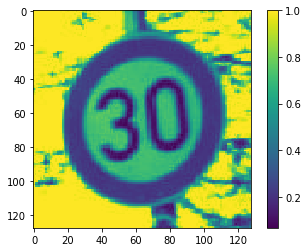

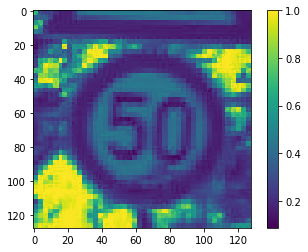

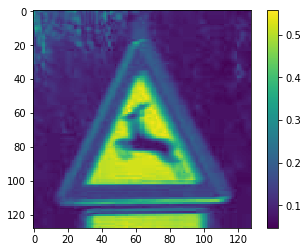

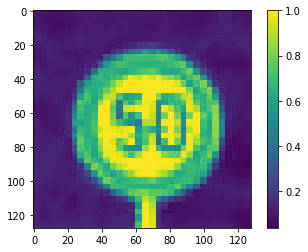

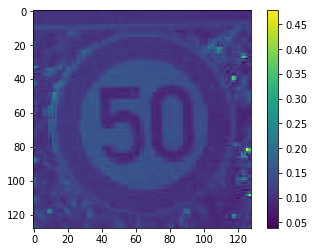

In [448]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
for i in X_train[:5]:
    plt.imshow(i)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [449]:
print(labels[3])
print(imgs_path[3])

2
F:/datasets/50/50_kmph.730.jpg


# dividing the train data & test data 

In [450]:
X=X_train[:18000]
Y=labels[ :18000]
X_test=X_train[18000: ]
Y_test=labels[18000: ]

In [452]:
print(X[1])
print(Y[1])
print(X_test[1])
print(Y_test[1])

[[0.68235294 0.70588235 0.71372549 ... 0.16862745 0.17254902 0.16862745]
 [0.70196078 0.69803922 0.6745098  ... 0.16862745 0.16862745 0.16862745]
 [0.73333333 0.68627451 0.60784314 ... 0.16470588 0.16862745 0.16470588]
 ...
 [0.83529412 0.82352941 0.84705882 ... 0.57647059 0.57647059 0.54901961]
 [0.85490196 0.83529412 0.85098039 ... 0.55294118 0.5372549  0.52941176]
 [0.85098039 0.82745098 0.83921569 ... 0.55294118 0.54901961 0.55686275]]
2
[[0.21960784 0.21568627 0.20784314 ... 0.18823529 0.20392157 0.19607843]
 [0.21568627 0.21176471 0.20392157 ... 0.19215686 0.20392157 0.19607843]
 [0.21176471 0.20784314 0.2        ... 0.19215686 0.20392157 0.19607843]
 ...
 [0.18823529 0.19215686 0.18431373 ... 0.27843137 0.29411765 0.28627451]
 [0.19607843 0.20392157 0.2        ... 0.27843137 0.29411765 0.28627451]
 [0.18039216 0.19215686 0.19215686 ... 0.2745098  0.29019608 0.28627451]]
15


# converting the data into the array form (1D)

In [360]:
X=np.array(X)
Y=np.array(Y)  


In [361]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)


# MODEL

In [186]:
import tensorflow as tf

In [467]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [468]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(2,2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(200, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(23, activation='softmax')
])

In [469]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [460]:
X = np.array(X).reshape(-1,128,128,1)
X_test = np.array(X_test).reshape(-1,128,128,1)

# training the model

In [471]:
model.fit(X,Y,epochs=10,batch_size=100,verbose=1)

Train on 18000 samples
Epoch 1/10
18000/18000 [==============================] - 178s 10ms/sample - loss: 1.9038 - accuracy: 0.3849
Epoch 2/10
18000/18000 [==============================] - 159s 9ms/sample - loss: 0.4356 - accuracy: 0.8570
Epoch 3/10
18000/18000 [==============================] - 160s 9ms/sample - loss: 0.1899 - accuracy: 0.9434
Epoch 4/10
18000/18000 [==============================] - 160s 9ms/sample - loss: 0.1159 - accuracy: 0.9659
Epoch 5/10
18000/18000 [==============================] - 160s 9ms/sample - loss: 0.0689 - accuracy: 0.9797
Epoch 6/10
18000/18000 [==============================] - 161s 9ms/sample - loss: 0.0627 - accuracy: 0.9814
Epoch 7/10
18000/18000 [==============================] - 160s 9ms/sample - loss: 0.0533 - accuracy: 0.9857
Epoch 8/10
18000/18000 [==============================] - 162s 9ms/sample - loss: 0.0290 - accuracy: 0.9911
Epoch 9/10
18000/18000 [==============================] - 160s 9ms/sample - loss: 0.0425 - accuracy: 0.9878
Epoc

In [472]:
predictions = model.predict(X_test)

In [473]:
predictions[0]

array([7.4837954e-32, 1.8464586e-23, 1.3000194e-29, 3.3301088e-26,
       1.6941170e-28, 5.6033437e-27, 4.6846177e-31, 1.1783341e-28,
       2.9939391e-19, 5.2288403e-16, 4.4945010e-20, 6.7225837e-21,
       5.9251309e-20, 1.9462961e-22, 2.4236090e-15, 1.0643654e-21,
       1.0000000e+00, 1.6504962e-22, 4.7978449e-26, 2.8273150e-19,
       9.5013346e-19, 3.0452645e-20, 1.1875611e-15], dtype=float32)

In [516]:

i=np.argmax(predictions[2565])
print(lis[i])

dang_cur_to_left


In [517]:
lis[Y_test[2565]]

'dang_cur_to_left'

In [2]:
model.evaluate(X_test,Y_test)

# saving the model

In [487]:
model.save('cnn.model')

INFO:tensorflow:Assets written to: cnn.model\assets


INFO:tensorflow:Assets written to: cnn.model\assets
